# Chem 30324, Spring 2020, Homework 7

# Due March 27, 2020

## Variations on the hydrogen atom:
### The *variational principle* guarantees that the expectation value of the energy of a guessed wavefunction is allows greater than that of the true lowest energy solution. Here you will apply the variational principle to the H atom.  For this problem it is easiest to work in atomic units.  In these units, $\hbar$, $a_0$, and $4\pi\epsilon_0$ are all equal to 1 and the unit of energy is the Hartree, equivalent to 27.212 eV.  In atomic units the H atom Schrödinger equation is written:

$$\left \{-\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}+\frac{l(l+1)}{2r^2}  \right \}R(r) = ER(r)$$

### 1. Suppose in a fit of panic you forget the 1s radial function when asked on an exam. Not wanting to leave the answer blank, you decide to guess something, and liking bell-shaped curves, you guess $R_{10}(r) = e^{-r^2}$.  Normalize this guess. Do not forget to include the $r^2$ Jacobian integration factor.

Set $R_{10}(r)=Ce^{-r^2}$ , then normalized the guess to get C
$$\int_{0}^{\infty}C^2e^{-2r^2}r^2dr = 1$$, $$C = \sqrt \frac{1}{\int_{0}^{\infty}e^{-2r^2}r^2dr}$$

In [0]:
import sympy as sy
import numpy as np
from sympy import *

In [0]:
r = Symbol('r')
I = integrate(exp(-2*r**2)*r**2,(r,0,+oo))
C = sqrt(1/I)
print(latex(simplify(C)))

\frac{2}{\sqrt[4]{\pi}} 2^{\frac{3}{4}}


So the normalized 1s wavefunction is $\tilde{R}_{10}(r) = \frac{2}{\sqrt[4]{\pi}} 2^{\frac{3}{4}} e^{-r^2} = (\frac{128}{\pi}) ^ {\frac{1}{4}} e^{-r^2} $.


### 2. Calculate the expectation value of the energy of your normalized guess.  Is it greater or less than the true value?

$\because$ 1s orbital, n=1,l=0
$$\therefore \hat{H} = -\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}$$ 

$$\frac{d(\tilde{R}_{10})}{dr}= -2rCe^{-r^2} $$
$$\frac{d^2(\tilde{R}_{10})}{dr^2}=-2Ce^{-r^2}+4r^2Ce^{-r^2}$$

$$\hat{H}\tilde{R}_{10}(r) = -\frac{1}{2}\frac{d^2(\tilde{R}_{10})}{dr^2} - \frac{1}{r}\frac{d(\tilde{R}_{10})}{dr}-\frac{1}{r}(\tilde{R}_{10}) = Ce^{-r^2}-2r^2Ce^{-r^2} +2Ce^{-r^2} -\frac{Ce^{-r^2}}{r} = \frac{Ce^{-r^2}(-2r^3+3r-1)}{r}$$ 

The expectation value of the energy:
$$\langle E\rangle = \int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2r^4+3r^2-r)e^{-2r^2} dr$$

In [0]:
E = C**2*integrate((-2*r**4+3*r**2-r)*exp(-2*r**2),(r,0,oo))
print('Expected value is %0.4f Ha.'%E)

Expected value is -0.0958 Ha.


In [0]:
# Hydrogen atom energy equation is given in class notes
n=1
E_true = -1/(2*n**2) # unit Ha
print('The ture value is %0.4f Ha. So the expected value is greater than the true value.' %E_true)

The ture value is -0.5000 Ha. So the expected value is greater than the true value.


### 3. What does the variational principle say about the expectation value of the energy of your guess as you vary a parameter $\gamma$ in your guess, $R_{10}=e^{-\gamma r^2}$?  Suggest a strategy for determining the "best" $\gamma$.

The variational principle says true wavefunction energy is always lower bound on energy of any trial wavefunction. 
$$\langle ψ_\text{trial}^λ | \hat{H} | ψ_\text{trial}^λ\rangle =E_\text{trial}^λ \geq E_0$$

We can get the "best" $\gamma$ by optimizing the wavefunction with respect to variational parameter: $$\frac{\partial\langle E\rangle}{\partial\gamma} = 0$$

### 3.5 *Extra credit*: Determine the best value of $\gamma$.  Show and carefully justify your work to receive credit.

Normalize $R_{10}$: $\int_{0}^{\infty}r^2C^2e^{-2\gamma r^2}dr = 1$
$$C = \sqrt \frac{1}{\int_{0}^{\infty}e^{-2\gamma r^2}r^2dr}$$

$$\therefore \hat{H} = -\frac{1}{2}\frac{d^2}{dr^2} - \frac{1}{r}\frac{d}{dr}-\frac{1}{r}$$ 

$$\frac{d(\tilde{R}_{10})}{dr}= -2\gamma rCe^{-\gamma r^2} $$
$$\frac{d^2(\tilde{R}_{10})}{dr^2}=-2\gamma Ce^{-\gamma r^2}+4\gamma ^2 r^2Ce^{-\gamma r^2}$$

$$\hat{H}\tilde{R}_{10}(r) = -\frac{1}{2}\frac{d^2(\tilde{R}_{10})}{dr^2} - \frac{1}{r}\frac{d(\tilde{R}_{10})}{dr}-\frac{1}{r}(\tilde{R}_{10}) = \gamma Ce^{-\gamma r^2}-2\gamma ^2r^2Ce^{- \gamma r^2} +2\gamma Ce^{-\gamma r^2} -\frac{Ce^{-\gamma r^2}}{r} = \frac{Ce^{-\gamma r^2}(-2\gamma ^2r^3+3\gamma r-1)}{r}$$ 

$\langle E\rangle = \int_{0}^{\infty}\tilde{R}_{10}(r)\hat{H}\tilde{R}_{10}(r)r^2dr = \int_{0}^{\infty} C^2(-2\gamma^2 r^4+3\gamma r^2-r)e^{-2\gamma r^2} dr$

In [0]:
gamma = symbols('gamma',positive=True) # We know the gamma has to be positive, or the R10 would be larger when r increase.
r = symbols("r",positive=True)
C = sqrt(1/integrate(exp(-2*gamma*r**2)*r**2,(r,0,oo))) 
E = C**2*integrate((-2*gamma**2*r**4+3*gamma*r**2-r)*exp(-2*gamma*r**2),(r,0,oo)) # expectation value of energy as a function of gamma
gamma_best=solve(diff(E,gamma),gamma)

print("Expectation of energy:");print(E)
print("Best value of gamma is: %s, which equals to %f."% (gammabest,8/(9*np.pi)))


Expectation of energy:
8*sqrt(2)*gamma**(3/2)*(-1/(4*gamma) + 3*sqrt(2)*sqrt(pi)/(32*sqrt(gamma)))/sqrt(pi)
Best value of gamma is: [8/(9*pi)], which equals to 0.282942.


In [0]:
import math
gamma_best = 8/(9*np.pi)
E_best = 8*math.sqrt(2)*gamma_best**(3/2)*(-1/(4*gamma_best) + 3*math.sqrt(2)*math.sqrt(np.pi)/(32*math.sqrt(gamma_best)))/math.sqrt(np.pi)
print("Energy with the best gamma: %0.3f eV."%E_best)

Energy with the best gamma: -0.424 eV.


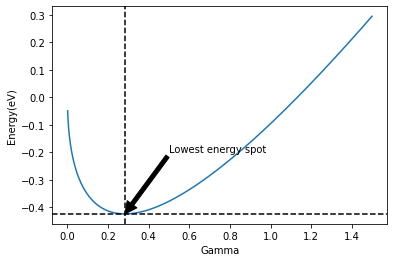

In [0]:
import matplotlib.pyplot as plt

gamma = np.linspace(0.001,1.5,10000)
E = []
for x in gamma:
    E.append(8*math.sqrt(2)*x**(3/2)*(-1/(4*x) + 3*math.sqrt(2)*math.sqrt(np.pi)/(32*math.sqrt(x)))/math.sqrt(np.pi))

plt.plot(gamma,E)
plt.xlabel("Gamma")
plt.ylabel("Energy(eV)")
plt.axvline(x=8/(9*np.pi),color='k',linestyle='--')
plt.axhline(y=E_best,color='k',linestyle='--')
plt.annotate('Lowest energy spot', xy=(8/(9*np.pi), E_best), xytext=(0.5,-0.2), arrowprops=dict(facecolor='black'))
plt.show()

## Many-electrons means many troubles
### Helium (He) is only one electron larger than hydrogen, but that one more electron makes a big difference in difficulty in setting up and solving the Schrödinger equation.

### 4. Write down in as much detail as you can the exact Schrödinger equation for the electrons in a He atom.

Schrödinger equation: 
$$\hat{H}\Psi(r_1,r_2)=E\Psi(r_1,r_2)$$
$$\hat{H}=\hat{h_1}+\hat{h_2}+\frac{e^2}{4\pi\epsilon_0}\frac{1}{|r_1-r_2|}$$
$$\hat{h_1}=-\frac{\hbar^2}{2m_e}\nabla^2_1-\frac{2e^2}{4\pi\epsilon_0}\frac{1}{r_1}$$
$$\hat{h_2}=-\frac{\hbar^2}{2m_e}\nabla^2_2-\frac{2e^2}{4\pi\epsilon_0}\frac{1}{r_2}$$

### 5. This equation is conventionally solved within the "independent electron" approximation, by writing an effective one-electron Schrödinger equation with approximate potentials (shown below in atomic units).  Briefly, what does it mean to solve this equation "self-consistently"?

$$\left\{-\frac{1}{2}\nabla^2 - \frac{2}{r} + \hat v_\mathrm{Coul}[\psi_i] + \hat
            v_\mathrm{ex}[\psi_i]+\hat v_\mathrm{corr}[\psi_i] \right\}\psi=\epsilon\psi$$
            


All the potential terms $\hat{\nu}$ depend on the $\psi$ solved. The self-consistently means we get a $\psi$ solution, then we use it to calculate new potential terms and solve for new $\psi$, and repeat until we get a $\psi$ same with the last one.

### 6. How many solutions are needed to describe the electrons in a He atom?  Provide a possible set of quantum numbers ($n, l, m_l , m _s$)  for each electron.

One solution for each orbital, so there needs to be only one solution to describe the electrons in the He atom. 

Two possible set of quantum numbers for each electron: 
$$n=1, l=0, m_l=0, m_s=+\frac{1}{2}$$
$$n=1, l=0, m_l=0, m_s=-\frac{1}{2}$$

### 7. The Schrödinger equation has five terms, or operators, on the left.  Identify the physical meaning of each term and the *sign* of the expectation value when it is applied to one of the solutions.

$-\frac{1}{2}\nabla^2$: Kinetic energy. Always positive.

$-\frac{2}{r}$: Due to the attraction between the electron and the nucleus. Negative.

$\hat{\nu}_{coul}$: Classical repulsion between distinguishable electron “clouds”. Positive. 

$\hat{\nu}_{ex}$: Accounts for electron indistinguishability (Pauli principle for fermions). Decreases
Coulomb repulsion because electrons of like spin intrinsically avoid one another. Negative.

$\hat{\nu}_{corr}$: Decrease in Coulomb repulsion due to dynamic ability of electrons to avoid
one another; “fixes” orbital approximation. Negative.

### Sophisticated computer programs that solve the many-electron Schrödinger equation are now widely available and powerful tool for predicting the properties of atoms, molecules, solids, and interfaces. *Density functional theory* (DFT) is the most common set of approximations for the electron-electron interactions used today. In this problem you’ll do a DFT calculation using the *Orca* program (<https://www.its.hku.hk/services/research/hpc/software/orca>).

### Now, let’s set up your calculation (you may do this with a partner or two if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to draw an atom on the screen.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Choose Orca
6. Select “Molecular Orbitals” for the Calculation type, “PBE” for theory, “def2-SVP” for the basis set, “0” for the charge, an appropriate value for the "Multiplicity", and check “Unrestricted.” 
7. Select the right arrow to run the calculation.
8. From the job manager window choose the completed calculation to view the results.
9. For fun, click on the Magnifying Glass icons to see the molecular orbitals in 3-D. You may have to play around with the Display Settings and Preferences to get good views.

### 8. Perform calculations across the first row of the periodic table (B, C, N, O, F, Ne).  Make a table of energies of the occupied orbitals and identify them by their shell ( $n = 1, 2, \ldots$) and subshell (s, p, d, ...). 

|B(doublet)|Energy (Hartree)|C(triplet)|Energy (Hartree)|N(quarlet)|Energy (Hartree)|O(triplet)|Energy (Hartree)|F(doublet)|Energy (Hartree)|Ne(singlet)|Energy (Hartree)|
|-|-|-|-|-|-|-|-|-|-|-|-|
|1s|-13.23430|1s|-20.01336|1s|-28.13652|1s|-37.71226|1s|-48.64339|1s|-30.45968|
|2s|-0.65884|2s|-0.93550|2s|-1.23866|2s|-1.63718|2s|-2.06968|2s|-1.26438|
|2p|-0.15147|2p|-0.43435|2p|-0.87602|2p|-1.30625|2p|-1.89967|2p|-1.34278|

### 9. Contrast the energies of the 1s electrons across the series.  Determine the wavelength of light necessary to remove each 1s electron. What range of the spectrum is this light in?

In [3]:
# From http://www.genstrom.net/public/biology/common/en/em_spectrum.html
print("The 1s energies become increasingly negative with inceasing Z.  Light must become increasingly energetic to kick out one of them.")

hc = 1239.8 #eV*nm
E = [13.23430*27.212, 20.01336*27.212, 28.13652*27.212, 37.71226*27.212,48.64339*27.212,30.45968*27.212] # eV
lamb = [] #nm
for e in E:
    lamb.append(hc/e)
print(lamb,"nm.\nThey corresponds to X-rays.")

The 1s energies become increasingly negative with inceasing Z.  Light must become increasingly energetic to kick out one of them.
[3.4426287758277865, 2.276518386114959, 1.619275660527232, 1.2081159285584495, 0.9366284300485159, 1.4957734949263313] nm.
They corresponds to X-rays.


### 10. Why, qualitatively, do the energies vary as they do?

*There is a big energy decrease as it goes across the series because the electrostatic attraction of the nucleus for electrons increases as the 
the number of protons increases.

### 11. Compare the energies of the highest-energy (valence) electrons compare across the series. Determine the wavelength of light necessary to remove each valence electron. What range of the spectrum is this light in?

In [0]:
hc = 1239.8 #eV*nm
E = [0.15147*27.212, 0.43435*27.212, 0.87602*27.212, 1.30625*27.212,1.89967*27.212,1.34278*27.212] # eV
lamb = [] #nm
for e in E:
    lamb.append(hc/e)
print(lamb,"nm.\nThey corresponds to UVs")

[300.79079690986777, 104.89416831573081, 52.00883770683052, 34.87906756588531, 23.983524511066488, 33.93019110199561] nm.
They corresponds to UVs


### 12. Why, qualitatively, do the energies vary as they do?

There is a decrease as it goes across the series because the electrostatic attraction of the nucleus for electrons increases as the 
the number of protons increases.

And energy decrease is smaller because the outer electrons are partially shielded from the attractive force of the protons in the nucleus by inner electrons.